In [1]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
philly_data = pd.read_csv(r'./philadelphia_restaurants.csv')
philly_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104.0,39.953391,-75.196765,4.0,8,0,"{'GoodForKids': 'False', 'RestaurantsReservati...","Restaurants, Food Stands",NaN
5848,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119.0,40.060414,-75.191084,4.0,21,0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Sandwiches, Restaurants, Italian","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
5849,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128.0,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
5850,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104.0,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."


In [3]:
def calculate_distance(latitude_1, longitude_1, latitude_2, longitude_2):
    return geodesic((latitude_1, longitude_1), (latitude_2, longitude_2)).miles

In [32]:
philly_distance_graph = pd.DataFrame(columns=['restaurant_from', 'restaurant_to', 'distance'])
for i in range(len(philly_data)):
    for j in range(i+1, len(philly_data)):
        philly_distance_graph = pd.concat(
            [
                philly_distance_graph,
                pd.DataFrame(
                    {
                        'restaurant_from': philly_data['business_id'][i],
                        'restaurant_to': philly_data['business_id'][j],
                        'distance': calculate_distance(
                                        latitude_1=philly_data.loc[i, 'latitude'],
                                        longitude_1=philly_data.loc[i, 'longitude'],
                                        latitude_2=philly_data.loc[j, 'latitude'],
                                        longitude_2=philly_data.loc[j, 'longitude']
                                    )
                    },
                    index=[0]
                )
            ],
            ignore_index=True 
        )


/var/folders/tp/xhg0_2r975dcj4cmr1zw6mbc0000gn/T/ipykernel_72163/754648730.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  philly_distance_graph = pd.concat(


KeyboardInterrupt: 

In [ ]:
philly_distance_graph

In [4]:
sb_data = pd.read_csv(r'./santa_barbara_restaurants.csv')
sb_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
1,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
2,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64,1,"{'Alcohol': ""u'none'"", 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."
3,UFpCraqzFBAhtZqmxmiWsA,Cat Therapy,"1213 State St, Ste L",Santa Barbara,CA,93101,34.423302,-119.705471,4.5,116,1,"{'WheelchairAccessible': 'True', 'WiFi': ""u'fr...","Themed Cafes, Cafes, Pets, Arts & Entertainmen...","{'Monday': '10:0-17:15', 'Wednesday': '10:0-19..."
4,Hqz96v1ymucUKNzIWfEKXw,Subway,"1936 State St, Ste B",Santa Barbara,CA,93101,34.430822,-119.714156,3.0,5,0,"{'Alcohol': ""u'none'"", 'Caters': 'True', 'Bike...","Restaurants, Delis, Sandwiches, Fast Food","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,Hlx8S2GLF7hMuIKx4sU-gg,Cesar's Place,712 N Milpas St,Santa Barbara,CA,93103,34.428599,-119.688223,4.0,117,1,"{'BYOBCorkage': ""'no'"", 'RestaurantsReservatio...","Mexican, Restaurants, Fish & Chips","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
763,bVaRZDHkWdsHuARGxxpREw,Sushi Bar 29,1134 Chapala St,Santa Barbara,CA,93101,34.422291,-119.705339,4.5,97,1,"{'WiFi': ""u'no'"", 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3..."
764,izSgTrqebu8bN8ONOCs6cQ,Oat Bakery,5 W Haley St,Santa Barbara,CA,93101,34.416548,-119.695626,5.0,123,1,"{'Alcohol': ""u'none'"", 'HasTV': 'False', 'Bike...","Bakeries, Vegan, Specialty Food, Food Delivery...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '..."
765,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': ""{'garag...","Barbeque, Bars, Restaurants, Nightlife",NaN


In [5]:
sb_distance_graph = pd.DataFrame(columns=['restaurant_from', 'restaurant_to', 'distance'])
for i in range(len(sb_data)):
    for j in range(i+1, len(sb_data)):
        sb_distance_graph = pd.concat(
            [
                sb_distance_graph,
                pd.DataFrame(
                    {
                        'restaurant_from': sb_data['business_id'][i],
                        'restaurant_to': sb_data['business_id'][j],
                        'distance': calculate_distance(
                                        latitude_1=sb_data.loc[i, 'latitude'],
                                        longitude_1=sb_data.loc[i, 'longitude'],
                                        latitude_2=sb_data.loc[j, 'latitude'],
                                        longitude_2=sb_data.loc[j, 'longitude']
                                    )
                    },
                    index=[0]
                )
            ],
            ignore_index=True 
        )


/var/folders/tp/xhg0_2r975dcj4cmr1zw6mbc0000gn/T/ipykernel_22775/4247044419.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sb_distance_graph = pd.concat(


In [6]:
sb_distance_graph

,restaurant_from,restaurant_to,distance
0,IDtLPgUrqorrpqSLdfMhZQ,SZU9c8V2GuREDN5KgyHFJw,0.510173
1,IDtLPgUrqorrpqSLdfMhZQ,ifjluUv4VASwmFqEp8cWlQ,2.522304
2,IDtLPgUrqorrpqSLdfMhZQ,UFpCraqzFBAhtZqmxmiWsA,1.042762
3,IDtLPgUrqorrpqSLdfMhZQ,Hqz96v1ymucUKNzIWfEKXw,1.753206
4,IDtLPgUrqorrpqSLdfMhZQ,JWFpjvCc_nkNDVtMPx1ZGg,0.932987
...,...,...,...
293756,bVaRZDHkWdsHuARGxxpREw,TSwMwVq5GtQh5LW2t32uGA,1.829749
293757,bVaRZDHkWdsHuARGxxpREw,uriD7RFuHhLJeDdKaf0nFA,2.335645
293758,izSgTrqebu8bN8ONOCs6cQ,TSwMwVq5GtQh5LW2t32uGA,2.490584
293759,izSgTrqebu8bN8ONOCs6cQ,uriD7RFuHhLJeDdKaf0nFA,3.016678


In [7]:
sb_distance_graph.to_csv("santa_barbara_distance_graph.csv", index=False)

In [19]:
philly_graph = nx.Graph()

philly_graph.add_nodes_from(philly_data.business_id)

for i in range(len(philly_data)):
    for j in range(i+1, len(philly_data)):
        philly_graph.add_edge(
            philly_data['business_id'][i], 
            philly_data['business_id'][j],
            distance=calculate_distance(
                latitude_1=philly_data.loc[i, 'latitude'],
                longitude_1=philly_data.loc[i, 'longitude'],
                latitude_2=philly_data.loc[j, 'latitude'],
                longitude_2=philly_data.loc[j, 'longitude']
            )
        )

NameError: name 'plt' is not defined

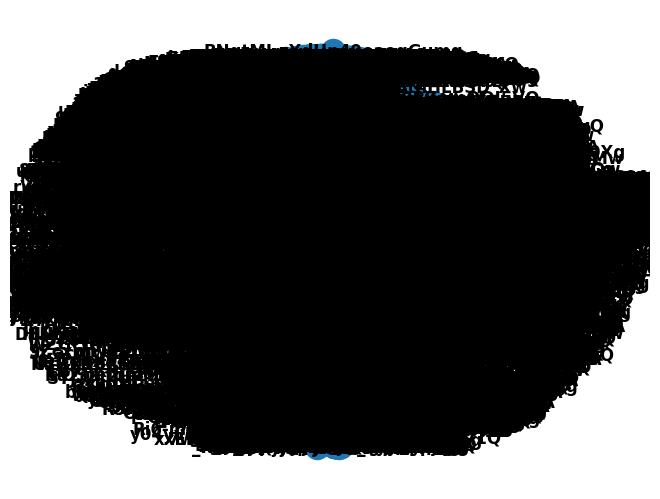

In [20]:
layout = nx.spring_layout(philly_graph)
nx.draw(philly_graph, layout, with_labels=True, font_weight='bold')

labels = nx.get_edge_attributes(philly_graph, 'weight')
nx.draw_networkx_edge_labels(philly_graph, layout, edge_labels=labels)

plt.show()

In [22]:
philly_graph